In [36]:
import pandas as pd


In [37]:
!pip install openpyxl


In [38]:
# # Lire toutes les feuilles du fichier Excel
# xlsx = pd.read_excel("data/dataset.xlsx", sheet_name=None)

# # Parcourir le dictionnaire de DataFrames
# for sheet_name, df in xlsx.items():
#     # Enregistrer chaque DataFrame dans un fichier CSV
#     csv_file = f"data/{sheet_name}.csv"
#     df.to_csv(csv_file, index=False)

In [39]:

# Lire les fichiers CSV
df1 = pd.read_csv("data/Year 2009-2010.csv")
df2 = pd.read_csv("data/Year 2010-2011.csv")

# Concaténer les DataFrames
df = pd.concat([df1, df2])

# Enregistrer le résultat dans un nouveau fichier CSV
df.to_csv("data/bronze.csv", index=False)


In [40]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


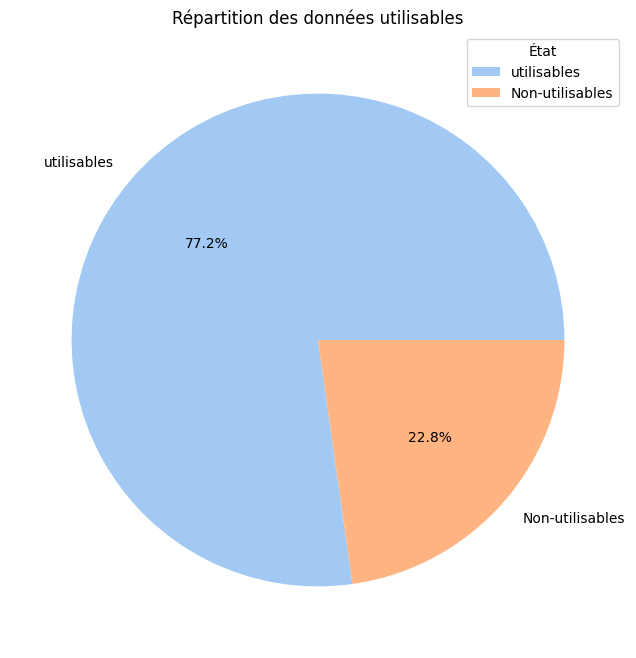

In [52]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Calculer le pourcentage de Customer ID null
null_percentage = (df['Customer ID'].isnull().sum() / len(df)) * 100
non_null_percentage = 100 - null_percentage

# Créer un DataFrame pour le graphique
data = {'État': ['utilisables', 'Non-utilisables'],
        'Pourcentage': [non_null_percentage, null_percentage]}
df_plot = pd.DataFrame(data)

# Créer le graphique circulaire
plt.figure(figsize=(8, 8))
plt.title('Répartition des données utilisables')
sns.set_palette('pastel')  # Utiliser une palette de couleurs pastel
plt.pie(df_plot['Pourcentage'], labels=df_plot['État'], autopct='%1.1f%%')
plt.legend(title='État')

# Afficher le graphique
plt.show()


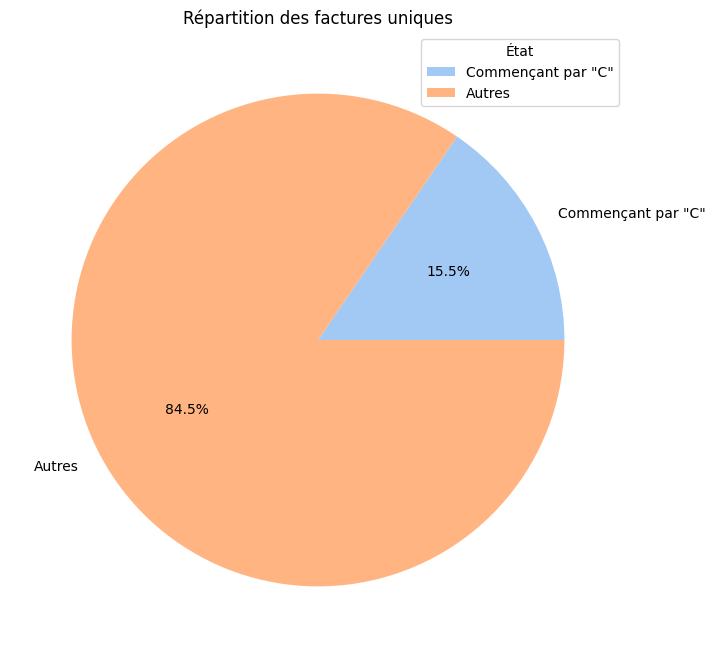

In [46]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Supprimer les factures en double dans la colonne "Invoice"
df_unique_invoices = df.drop_duplicates(subset='Invoice')

# Filtrer les factures qui commencent par "C"
invoices_starting_with_c = df_unique_invoices[df_unique_invoices['Invoice'].str.startswith('C')]

# Créer un DataFrame pour le graphique
data = {'État': ['Commençant par "C"', 'Autres'],
        'Count': [len(invoices_starting_with_c), len(df_unique_invoices) - len(invoices_starting_with_c)]}
df_plot = pd.DataFrame(data)

# Créer le graphique circulaire
plt.figure(figsize=(8, 8))
plt.title('Répartition des factures uniques')
sns.set_palette('pastel')  # Utiliser une palette de couleurs pastel
plt.pie(df_plot['Count'], labels=df_plot['État'], autopct='%1.1f%%')
plt.legend(title='État')

# Afficher le graphique
plt.show()


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1067371 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 73.3+ MB


In [ ]:
df.isnull().sum()		# pour savoir si il y a des nul

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [ ]:
df[df['Customer ID'].isnull()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [ ]:
df[df['Quantity'] < 0]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [ ]:
for col in df.columns:
    unique_values = df[col].nunique()
    print(f"colonne {col} : {unique_values}")

colonne Invoice : 53628
colonne StockCode : 5305
colonne Description : 5698
colonne Quantity : 1057
colonne InvoiceDate : 47635
colonne Price : 2807
colonne Customer ID : 5942
colonne Country : 43


In [ ]:
df[df['Invoice'].astype(str).str.startswith('C')]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [ ]:
mask = df['Invoice'].astype(str).str.startswith('C') & ~df.duplicated(subset=['Invoice'], keep='first')
df_filtered = df[mask]
df_filtered   ## annulation annuque 

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.0,United Kingdom
285,C489476,22149,FELTCRAFT 6 FLOWER FRIENDS,-6,2009-12-01 10:55:00,2.10,13293.0,United Kingdom
316,C489503,21540,DAIRY MAID CERAMIC BUTTER DISH,-2,2009-12-01 11:04:00,4.25,16011.0,United Kingdom
318,C489504,85083,KISS REINDEER SCANDINAVIAN STOCKING,-6,2009-12-01 11:10:00,2.55,13916.0,United Kingdom
...,...,...,...,...,...,...,...,...
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom
540448,C581490,22178,VICTORIAN GLASS HANGING T-LIGHT,-12,2011-12-09 09:57:00,1.95,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom


In [ ]:

# df = df[~df['Invoice'].astype(str).str.startswith('C')]
# df

In [ ]:
df.loc[:, 'InvoiceDate'] = pd.to_datetime(df['InvoiceDate']).dt.date
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09,4.95,12680.0,France


In [ ]:
# df = df[pd.to_datetime(df['InvoiceDate']) <= '2010-12-31']
# df

## Cela ne conservera que les lignes où la colonne InvoiceDate est comprise entre le 2010-01-01 et le 2010-12-31
# df = df.loc[(pd.to_datetime(df['InvoiceDate']) >= '2010-01-01') & (pd.to_datetime(df['InvoiceDate']) <= '2010-12-31')]


In [ ]:
df_client = df.loc[df['Customer ID'] == 17399.0	]
df_client

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
241824,C512770,M,Manual,-1,2010-06-17,25111.09,17399.0,United Kingdom


In [ ]:
# df = df.drop('Description', axis=1)
# df

In [ ]:
df = df.dropna(subset=['Customer ID'])

In [ ]:
df['Total'] = df['Quantity'] * df['Price']
df

C:\Users\impej\AppData\Local\Temp\ipykernel_23328\122233440.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total'] = df['Quantity'] * df['Price']


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680.0,France,16.60
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09,4.95,12680.0,France,14.85


In [ ]:
df['total_facture'] = df.groupby('Invoice')['Total'].transform('sum')
df

C:\Users\impej\AppData\Local\Temp\ipykernel_23328\1015821107.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_facture'] = df.groupby('Invoice')['Total'].transform('sum')


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total,total_facture
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,6.95,13085.0,United Kingdom,83.40,505.30
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,81.00,505.30
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,81.00,505.30
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01,2.10,13085.0,United Kingdom,100.80,505.30
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01,1.25,13085.0,United Kingdom,30.00,505.30
...,...,...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680.0,France,12.60,267.45
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680.0,France,16.60,267.45
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680.0,France,16.60,267.45
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09,4.95,12680.0,France,14.85,267.45


In [ ]:
df['Montant'] = df.groupby('Customer ID')['total_facture'].transform('sum')
df

C:\Users\impej\AppData\Local\Temp\ipykernel_23328\4134821425.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Montant'] = df.groupby('Customer ID')['total_facture'].transform('sum')


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total,total_facture,Montant
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,6.95,13085.0,United Kingdom,83.40,505.30,27639.60
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,81.00,505.30,27639.60
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,81.00,505.30,27639.60
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01,2.10,13085.0,United Kingdom,100.80,505.30,27639.60
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01,1.25,13085.0,United Kingdom,30.00,505.30,27639.60
...,...,...,...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680.0,France,12.60,267.45,13193.46
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680.0,France,16.60,267.45,13193.46
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680.0,France,16.60,267.45,13193.46
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09,4.95,12680.0,France,14.85,267.45,13193.46


In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['year'] = df['InvoiceDate'].dt.year
df['month'] = df['InvoiceDate'].dt.month
df


C:\Users\impej\AppData\Local\Temp\ipykernel_23328\2909846582.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
C:\Users\impej\AppData\Local\Temp\ipykernel_23328\2909846582.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['InvoiceDate'].dt.year
C:\Users\impej\AppData\Local\Temp\ipykernel_23328\2909846582.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total,total_facture,Montant,year,month
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,6.95,13085.0,United Kingdom,83.40,505.30,27639.60,2009,12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,81.00,505.30,27639.60,2009,12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,81.00,505.30,27639.60,2009,12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01,2.10,13085.0,United Kingdom,100.80,505.30,27639.60,2009,12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01,1.25,13085.0,United Kingdom,30.00,505.30,27639.60,2009,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680.0,France,12.60,267.45,13193.46,2011,12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680.0,France,16.60,267.45,13193.46,2011,12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680.0,France,16.60,267.45,13193.46,2011,12
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09,4.95,12680.0,France,14.85,267.45,13193.46,2011,12


In [ ]:
df_pivot = df.pivot_table(index='Customer ID', columns='year', values='Invoice', aggfunc='nunique')
df_pivot.columns = [f'nombre_commande_client_années_{year}' for year in df_pivot.columns]
df_pivot = df_pivot.fillna(0)
df = df.merge(df_pivot, on='Customer ID', how='left')

df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total,total_facture,Montant,year,month,nombre_commande_client_années_2009,nombre_commande_client_années_2010,nombre_commande_client_années_2011
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,6.95,13085.0,United Kingdom,83.40,505.30,27639.60,2009,12,4.0,3.0,3.0
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,81.00,505.30,27639.60,2009,12,4.0,3.0,3.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,81.00,505.30,27639.60,2009,12,4.0,3.0,3.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01,2.10,13085.0,United Kingdom,100.80,505.30,27639.60,2009,12,4.0,3.0,3.0
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01,1.25,13085.0,United Kingdom,30.00,505.30,27639.60,2009,12,4.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824359,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680.0,France,12.60,267.45,13193.46,2011,12,0.0,0.0,4.0
824360,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680.0,France,16.60,267.45,13193.46,2011,12,0.0,0.0,4.0
824361,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680.0,France,16.60,267.45,13193.46,2011,12,0.0,0.0,4.0
824362,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09,4.95,12680.0,France,14.85,267.45,13193.46,2011,12,0.0,0.0,4.0


In [ ]:
df = df.reindex(columns=['Invoice', 'StockCode','Description' ,'Quantity', 'InvoiceDate', 'year', 'month', 'Price', 'Customer ID', 'Country', 'Total', 'total_facture', 'Montant', 'nombre_commande_client_années_2009', 'nombre_commande_client_années_2010', 'nombre_commande_client_années_2011'])
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,year,month,Price,Customer ID,Country,Total,total_facture,Montant,nombre_commande_client_années_2009,nombre_commande_client_années_2010,nombre_commande_client_années_2011
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,2009,12,6.95,13085.0,United Kingdom,83.40,505.30,27639.60,4.0,3.0,3.0
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,2009,12,6.75,13085.0,United Kingdom,81.00,505.30,27639.60,4.0,3.0,3.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01,2009,12,6.75,13085.0,United Kingdom,81.00,505.30,27639.60,4.0,3.0,3.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01,2009,12,2.10,13085.0,United Kingdom,100.80,505.30,27639.60,4.0,3.0,3.0
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01,2009,12,1.25,13085.0,United Kingdom,30.00,505.30,27639.60,4.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824359,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2011,12,2.10,12680.0,France,12.60,267.45,13193.46,0.0,0.0,4.0
824360,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,2011,12,4.15,12680.0,France,16.60,267.45,13193.46,0.0,0.0,4.0
824361,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,2011,12,4.15,12680.0,France,16.60,267.45,13193.46,0.0,0.0,4.0
824362,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09,2011,12,4.95,12680.0,France,14.85,267.45,13193.46,0.0,0.0,4.0


In [ ]:
# # Créer un dictionnaire pour stocker les valeurs de Customer ID pour chaque valeur de Invoice
# customer_id_dict = {}

# # Parcourir chaque ligne du DataFrame
# for index, row in df.iterrows():
#     # Si la valeur de Customer ID n'est pas NaN
#     if not pd.isnull(row['Customer ID']):
#         # Stocker la valeur de Customer ID dans le dictionnaire pour la valeur de Invoice correspondante
#         customer_id_dict[row['Invoice']] = row['Customer ID']

# # Parcourir chaque ligne du DataFrame à nouveau
# for index, row in df.iterrows():
#     # Si la valeur de Customer ID est NaN
#     if pd.isnull(row['Customer ID']):
#         # Si une valeur de Customer ID est disponible pour la valeur de Invoice correspondante
#         if row['Invoice'] in customer_id_dict:
#             # Remplacer la valeur NaN par la valeur trouvée dans le dictionnaire
#             df.at[index, 'Customer ID'] = customer_id_dict[row['Invoice']]
#         else:
#             # Sinon, supprimer la ligne
#             df.drop(index, inplace=True)

# # Réinitialiser l'index du DataFrame après avoir supprimé des lignes
# df.reset_index(drop=True, inplace=True)


In [ ]:
df_annulees = df[df['Invoice'].str.startswith('C')]
df_pivot_annulees = df_annulees.pivot_table(index='Customer ID', columns='year', values='Invoice', aggfunc='nunique')
df_pivot_annulees.columns = [f'nombre_commande_client_années_annulées_{year}' for year in df_pivot_annulees.columns]
df_pivot_annulees = df_pivot_annulees.fillna(0)
df = df.merge(df_pivot_annulees, on='Customer ID', how='left')
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,year,month,Price,Customer ID,Country,Total,total_facture,Montant,nombre_commande_client_années_2009,nombre_commande_client_années_2010,nombre_commande_client_années_2011,nombre_commande_client_années_annulées_2009,nombre_commande_client_années_annulées_2010,nombre_commande_client_années_annulées_2011
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,2009,12,6.95,13085.0,United Kingdom,83.40,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,2009,12,6.75,13085.0,United Kingdom,81.00,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01,2009,12,6.75,13085.0,United Kingdom,81.00,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01,2009,12,2.10,13085.0,United Kingdom,100.80,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01,2009,12,1.25,13085.0,United Kingdom,30.00,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824359,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2011,12,2.10,12680.0,France,12.60,267.45,13193.46,0.0,0.0,4.0,NaN,NaN,NaN
824360,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,2011,12,4.15,12680.0,France,16.60,267.45,13193.46,0.0,0.0,4.0,NaN,NaN,NaN
824361,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,2011,12,4.15,12680.0,France,16.60,267.45,13193.46,0.0,0.0,4.0,NaN,NaN,NaN
824362,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09,2011,12,4.95,12680.0,France,14.85,267.45,13193.46,0.0,0.0,4.0,NaN,NaN,NaN


In [ ]:
df['nombre_commande_client_années_annulées_2009'] = df['nombre_commande_client_années_annulées_2009'].fillna(0)
df['nombre_commande_client_années_annulées_2010'] = df['nombre_commande_client_années_annulées_2010'].fillna(0)
df['nombre_commande_client_années_annulées_2011'] = df['nombre_commande_client_années_annulées_2011'].fillna(0)
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,year,month,Price,Customer ID,Country,Total,total_facture,Montant,nombre_commande_client_années_2009,nombre_commande_client_années_2010,nombre_commande_client_années_2011,nombre_commande_client_années_annulées_2009,nombre_commande_client_années_annulées_2010,nombre_commande_client_années_annulées_2011
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,2009,12,6.95,13085.0,United Kingdom,83.40,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,2009,12,6.75,13085.0,United Kingdom,81.00,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01,2009,12,6.75,13085.0,United Kingdom,81.00,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01,2009,12,2.10,13085.0,United Kingdom,100.80,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01,2009,12,1.25,13085.0,United Kingdom,30.00,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824359,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2011,12,2.10,12680.0,France,12.60,267.45,13193.46,0.0,0.0,4.0,0.0,0.0,0.0
824360,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,2011,12,4.15,12680.0,France,16.60,267.45,13193.46,0.0,0.0,4.0,0.0,0.0,0.0
824361,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,2011,12,4.15,12680.0,France,16.60,267.45,13193.46,0.0,0.0,4.0,0.0,0.0,0.0
824362,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09,2011,12,4.95,12680.0,France,14.85,267.45,13193.46,0.0,0.0,4.0,0.0,0.0,0.0


In [ ]:
df['TT_annuler'] = df['nombre_commande_client_années_annulées_2009'] + df['nombre_commande_client_années_annulées_2010'] + df['nombre_commande_client_années_annulées_2011']
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,year,month,Price,Customer ID,Country,Total,total_facture,Montant,nombre_commande_client_années_2009,nombre_commande_client_années_2010,nombre_commande_client_années_2011,nombre_commande_client_années_annulées_2009,nombre_commande_client_années_annulées_2010,nombre_commande_client_années_annulées_2011,TT_annuler
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,2009,12,6.95,13085.0,United Kingdom,83.40,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0,2.0
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,2009,12,6.75,13085.0,United Kingdom,81.00,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0,2.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01,2009,12,6.75,13085.0,United Kingdom,81.00,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0,2.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01,2009,12,2.10,13085.0,United Kingdom,100.80,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0,2.0
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01,2009,12,1.25,13085.0,United Kingdom,30.00,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824359,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2011,12,2.10,12680.0,France,12.60,267.45,13193.46,0.0,0.0,4.0,0.0,0.0,0.0,0.0
824360,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,2011,12,4.15,12680.0,France,16.60,267.45,13193.46,0.0,0.0,4.0,0.0,0.0,0.0,0.0
824361,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,2011,12,4.15,12680.0,France,16.60,267.45,13193.46,0.0,0.0,4.0,0.0,0.0,0.0,0.0
824362,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09,2011,12,4.95,12680.0,France,14.85,267.45,13193.46,0.0,0.0,4.0,0.0,0.0,0.0,0.0


### création du nouveau CSV

In [ ]:
# df.to_csv("data/silver.csv" , index=False)   